# k_近邻算法
- 1.优点
  * 简单好用，容易理解，精度高，理论成熟，既可以用来做分类也可以用来做回归
  * 可用于数值型数据和离散型数据
  * 无数据输入假定
  * 适合对稀有事件进行分类
- 2.缺点
  * 计算复杂性高;空间复杂性高;
  * 计算量太大，所以一般数值很大的时候不用这个
  * 样本不平衡问题(即有些类别的样本数量很多，而其它样本的数量很少)
  * 可理解性比较差，无法给出数据的内在含义

### 1.k 近邻算法 python 实现

#### 1.1构建数据集

In [2]:
import pandas as pd
#先创建字典
rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'], 
         '打斗镜头':[1,5,12,108,112,115],
         '接吻镜头':[101,89,97,5,9,8],
         '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']} 
#创建成表格a
movie_data= pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


#### 1.2计算已知类别数据集中的点与当前点之间的距离

In [5]:
new_data=[24,67]
#iloc 选取行和列 打斗镜头和接吻镜头 运用到矩阵运算 行相加为 axis=1 
dist=list((((movie_data.iloc[:6,1:3]-new_data)**2).sum(1))**0.5)
dist     

[41.048751503547585,
 29.068883707497267,
 32.31098884280702,
 104.4030650891055,
 105.39449701004318,
 108.45275469069469]

#### 1.3 将距离升序排列，选取值最小的k个点

In [6]:
#把dist和电影类型进行联系，组成数据结构
dist_1=pd.DataFrame({'dist':dist,'labels':(movie_data.iloc[:6,3])})
#按照dist数值进行排序，选出前四个数字
dr=dist_1.sort_values(by='dist')[:4]
dr

,dist,labels
1,29.068884,爱情片
2,32.310989,爱情片
0,41.048752,爱情片
3,104.403065,动作片


#### 1.4确定前k个点所在类别的出现频率

In [9]:
#把dr的数据进行统计
re=dr.ix[:,'labels'].value_counts()
re

/Users/Florian_Gao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


爱情片    3
动作片    1
Name: labels, dtype: int64

#### 1.5选择频率最高的类别当作当前点的预测类别

In [10]:
result=[]
#选择re里面的第一个，也就是出现次数最多的那一个
result.append(re.index[0])
result

['爱情片']

### 2.封装函数

In [13]:
 import pandas as pd 
''' 
    函数功能:KNN分类器 
    参数说明:
            new_data:需要预测分类的数据集 
            dataSet:已知分类标签的数据集(训练集) 
            k:k-近邻算法参数，选择距离最小的k个点
    返回: 
            result:分类结果
'''
def  classify0(inX,dataSet,k):
    #先定义一个空列表
    result = []
    #计算距离
    dist = list((((dataSet.iloc[:,1:3]-inX)**2).sum(1))**0.5)
    #建立距离与电影类别的dataframe
    dist_l = pd.DataFrame({'dist':dist,'labels':(dataSet.iloc[:, 3])})
    #sort排序，选择前k个数据
    dr = dist_l.sort_values(by = 'dist')[: k]
    #进行统计
    re = dr.loc[:, 'labels'].value_counts()
    #找到数据最多的，分类完成
    result.append(re.index[0])
    return result

In [14]:
inX = new_data
dataSet = movie_data
k=3 
classify0(inX,dataSet,k)
 

['爱情片']

### 3.k-近邻算法-约会网站配对效果判定

海伦一直使用在线约会网站寻找适合自己的约会对象，尽管约会网站会推荐不同的人选，但她并不是每一个都喜
欢，经过一番总结，她发现曾经交往的对象可以分为三类:
  * 不喜欢的人
  * 魅力一般的人
  * 极具魅力得人

海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，其中各字段分别为:
- 1. 每年飞行常客里程
- 2. 玩游戏视频所占时间比 
- 3. 每周消费冰淇淋公升数

#### 3.1 准备数据

In [20]:
#将数据读取,绝对路径
datingTest = pd.read_table('/Users/Florian_Gao/Documents/13-菊安酱机器学习/数据集/datingTestSet.txt',header=None)
datingTest.head()

/Users/Florian_Gao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [21]:
datingTest.shape

(1000, 4)

In [59]:
#详细信息
#datingTest.info

#### 3.2 分析数据

Text(0, 0.5, '每周消费冰淇淋公升数')

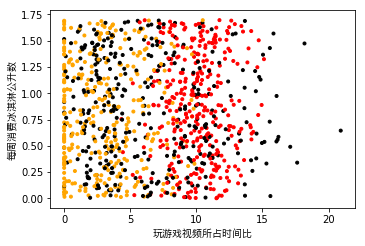

In [35]:
#建立plt
%matplotlib inline
import matplotlib as mpl
#mpl.matplotlib_fname()
import matplotlib.pyplot as plt
#与下面联系
from matplotlib.font_manager import FontManager, FontProperties


#把不同标签用颜色区分
Colors = []
#shape[0]是行
for i in range(datingTest.shape[0]):
    #m是最后一行的属性，喜欢，一般，还是不喜欢
    m = datingTest.iloc[i,-1]
    if m=='didntLike':
        Colors.append('black')
    if m=='smallDoses':
        Colors.append('orange')
    if m=='largeDoses':
        Colors.append('red')

#配置字体 解决matplotlib不显示中文的问题
#plt.rc('font', family='SimHei', size=13)
#plt.rcParams['font.sans-serif']=['KaiTi'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#唯一解决的办法
def getChineseFont():
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc')
''' 
if __name__ == '__main__':
    plot.title(u"我是道哥", fontproperties=getChineseFont())
    plot.show()
'''
    
#绘制两两特征之间的散点图
#设置图片的大小
pl=plt.figure(figsize=(12,8))
#参数 ，第一个是总行数，第二个总列数，第三个此图位置
fig1=pl.add_subplot(221) 

plt.scatter(datingTest.iloc[:,1],datingTest.iloc[:,2],marker='.',c=Colors) 
plt.xlabel('玩游戏视频所占时间比',fontproperties=getChineseFont())
plt.ylabel('每周消费冰淇淋公升数',fontproperties=getChineseFont())

/Users/Florian_Gao/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, '玩游戏视频所占时间比')

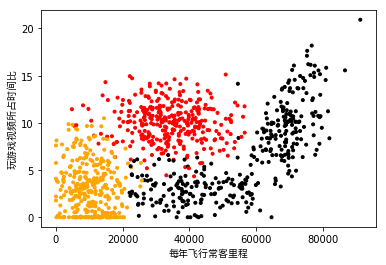

In [38]:
fig2=pl.add_subplot(222) 
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,1],marker='.',c=Colors) 
plt.xlabel('每年飞行常客里程',fontproperties=getChineseFont())
plt.ylabel('玩游戏视频所占时间比',fontproperties=getChineseFont())

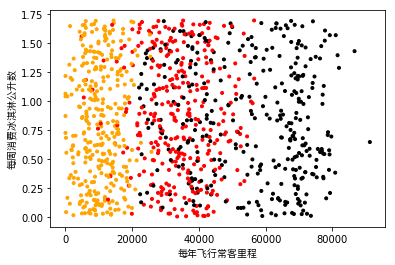

In [41]:
fig3=pl.add_subplot(223) 
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,2],marker='.',c=Colors) 
plt.xlabel('每年飞行常客里程',fontproperties=getChineseFont())
plt.ylabel('每周消费冰淇淋公升数',fontproperties=getChineseFont())
plt.show()

#### 3.3 数据归一化

我们很容易发现，上面公式中差值最大的属性对计算结果的影响最大，也就是说每年飞行常客里程对计算结果的影
响远远大于其他两个特征，原因仅仅是因为它的数值比较大，但是在海伦看来这三个特征是同等重要的，所以接下
来我们要进行数值归一化的处理，使得这三个特征的权重相等。

###### 数据归一化的处理方法有很多种，
比如0-1标准化、Z-score标准化、Sigmoid压缩法等等，在这里我们使用最简单 的0-1标准化，公式如下:        
                                             $x_{normalization}=\frac{x-Min}{Max-Min}$

In [42]:
"""
函数功能:归一化
参数说明:
dataSet:原始数据集 返回:0-1标准化之后的数据集 
"""
def minmax(dataSet):
    minDf = dataSet.min()
    maxDf = dataSet.max()
    normSet = (dataSet - minDf )/(maxDf - minDf)
    return normSet

#concat 是拼合 axis=1是列拼接
datingT = pd.concat([minmax(datingTest.iloc[:, :3]), datingTest.iloc[:,3]], axis=1)
datingT.head()

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike


#### 3.4划分训练集和测试集

为了测试分类器的效果，我们可以把原始数据集分为训练集和测试集两部分，训练集用来训练模型，测试集用来验证模型准确率
#### <font color='red'>Scikit Learn官网上也有相应的函数比如model_selection 类中的train_test_split 函数也可以完成训练集和测试集的切分</font>
通常来说，我们只提供已有数据的90%作为训练样本来训练模型，其余10%的数据用来测试模型。这里需要注意的 10%的测试数据一定要是随机选择出来的，由于海伦提供的数据并没有按照特定的目的来排序，所以我们这里可以 随意选择10%的数据而不影响其随机性。

In [43]:
"""
函数功能:切分训练集和测试集
参数说明:
dataSet:原始数据集
rate:训练集所占比例 返回:切分好的训练集和测试集 """
def randSplit(dataSet,rate=0.9):
    n = dataSet.shape[0]
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test.index = range(test.shape[0])
    return train,test

In [60]:
#datingT是已经数据归一化的df
train,test = randSplit(datingT)
#train有900，test有100
#train
#test
test.index

RangeIndex(start=0, stop=100, step=1)

#### 3.5 分类器针对于约会网站的测试代码

接下来，我们一起来构建针对于这个约会网站数据的分类器，上面我们已经将原始数据集进行归一化处理然后也切 分了训练集和测试集，所以我们的函数的输入参数就可以是train、test和k(k-近邻算法的参数，也就是选择的距离 最小的k个点)

In [63]:
""" 
函数功能:k-近邻算法分类器 参数说明:
train:训练集
test:测试集 k:k-近邻参数，即选择距离最小的k个点
返回:预测好分类的测试集
"""
def datingClass(train,test,k):
    n = train.shape[1] - 1
    m = test.shape[0]
    result = []
    for i in range(m):
        #这里n是不包括最后一列的,因为先比较数字，然后得出一个是什么类来
        dist = list((((test.iloc[i, :n]-train.iloc[:, :n]) ** 2).sum(1))**0.5)
        dist_l = pd.DataFrame({'dist': dist, 'labels': (train.iloc[:, n])})
        dr = dist_l.sort_values(by = 'dist')[: k]
        #统计label的数量
        re = dr.loc[:, 'labels'].value_counts()
        result.append(re.index[0])
    
    #把result变成一个列表
    result = pd.Series(result)
    #新增一列
    test['predict'] = result
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean() 
    print('模型预测准确率为%f' %acc)
    print(f'模型预测准确率为{acc}')
    return test

In [64]:
datingClass(train,test,5)

模型预测准确率为0.950000
模型预测准确率为0.95


/Users/Florian_Gao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,predict
0,0.513766,0.170320,0.262181,didntLike,didntLike
1,0.089599,0.154426,0.785277,smallDoses,smallDoses
2,0.611167,0.172689,0.915245,didntLike,didntLike
3,0.012578,0.000000,0.195477,smallDoses,smallDoses
4,0.110241,0.187926,0.287082,smallDoses,smallDoses
5,0.812113,0.705201,0.681085,didntLike,didntLike
6,0.729712,0.490545,0.960202,didntLike,didntLike
7,0.130301,0.133239,0.926158,smallDoses,smallDoses
8,0.557755,0.722409,0.780811,largeDoses,largeDoses
9,0.437051,0.247835,0.131156,largeDoses,didntLike
